### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # 가우시안 분포를 따르는 나이브즈 확률..
# from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Acquire Data

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Data Description
- PassengerId : 승객 고유 번호 -> 모델링 시 제거
- Survived : 생존 여부 (0 = 사망, 1 = 생존) (Label, 종속 변수)
- Pclass : 티켓의 승선권 클래스 (1st = Upper, 2nd = Middle, 3rd = Lower)
- Name : 이름 -> 모델링 시 제거
- Sex : 성별 (Male/Female)
- Age : 나이
- Sibsp : 동반한 Siblings(형제자매), Spouse(배우자) 수
- Parch : 동반한 Parent(부모), Child(자식) 수수
- Ticket : 티켓 고유 넘버 -> 모델링 시 제거
- Fare : 티켓 요금
- Cabin : 객실 번호
- Embarked : 승선한 항 (C = Cherbourg, Q = Queenstown, S = Southampton)

---------------------------------------------------------------

### categorical : binary
- Survived (0 = 사망, 1 = 생존)
- Sex (Male/Female)

### categorical : ordinal
- Pclass (1>2>3)

### categorical : nominal
- cabin (객실 코드)
- Embarked (C, Q, S)

### numerical : continuous (실수 가능)
- Age
- Fare
### numerical : discrete (정수만 가능)
- Sibsp
- Parch

In [ ]:
train_df = train_df.drop(['PassengerId', 'Name'], axis=1)

In [ ]:
test_df = test_df.drop(['PassengerId', 'Name'], axis=1)

In [ ]:
train_df.columns, test_df.columns

In [ ]:
train_df.head()

In [ ]:
train_df.tail()

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.info()

- mixed data type : Ticket
- missing value : Age, Cabin, Embark

In [ ]:
test_df.info()

In [ ]:
test_df.isnull().sum()

### 결측값 확인
- Ages : (train) 177 / 891개, (test) 86 / 418개
- Cabin : (train) 687 / 891개, (test) 327 / 418개
- Embarked : (train) 2 / 891개, (test) 0 / 418개

### 결측값 보완
- Ages : 평균값 또는 중앙값으로 대체
- Cabin : 대부분 결측값. 값이 있음/없음으로 대체
- Embarked : 가장 많은 값으로 대체

### 궁금한 점
- Embarked 처럼 결측값 개수가 적은 경우, 해당 데이터를 삭제해도 됨?

### .describe()
- 수치형 (Numerical) 변수에 대한 기초 통계 요약 제공
- count : 개수수
- mean : 평균
- std : 표준 편차
- min/max : 최소값/최댓값
- 25% (Q1) : 데이터의 하위 25% (1사분위수)
- 50% (Q2) : 중앙값
- 70% (Q3) : 데이터의 상위 25% (3사분위수)

mean vs 중앙값
이상치가 평균mean에 미치는 영향
이상치에 영향을 받는 값 : 평, 표편, 범위

iqr -> isolation forest -> 이상탐지

In [ ]:
train_df.describe()

[survived]
- train dataset : 생존률 38%  |  실제 생존률 32% => actual problem domain을 나타낸다고 할 수 있음

[Pclass]
- 중앙값 = 

[SibSp]
- 하위 25% 경계값 = 0 => 75% 이상의 승객은 형제자매, 배우자 없이 탑승

[Parch]
- 하위 25% 경계값 = 0 => 75% 이상의 승객은 부모, 자녀 없이 탑승

### seaborn.FacetGrid
- 하나의 플롯에 여러 개 서브 플롯 만들 때
- 특정 변수에 따라 데이터를 분할하여 시각화
- matplotlib의 subplot과 유사

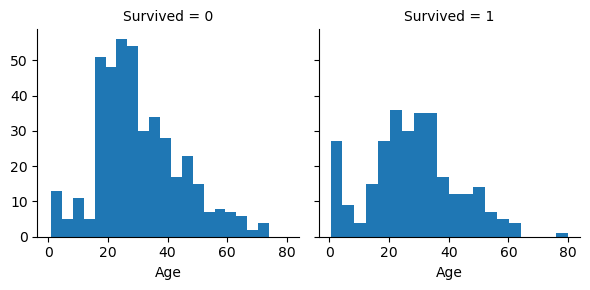

In [ ]:
g = sns.FacetGrid(train_df, col='Survived') # 'Survived' 별로 서브 플롯 나눔
g.map(plt.hist, 'Age', bins=20)             # 각 플롯에 'Age' 히스토그램 그리기

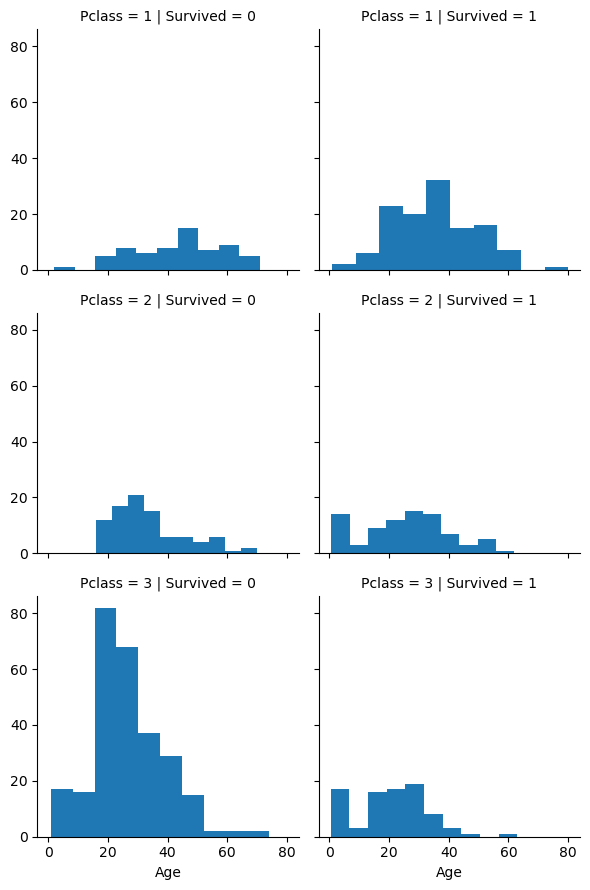

In [ ]:
g2 = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g2.map(plt.hist, 'Age')

[pointplot]
- 카테고리 변수에 대한 평균값과 신뢰 구간을 시각화
- 각 그룹별 평균값을 점으로 표시
- 신뢰 구간을 세로선으로 표현

c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


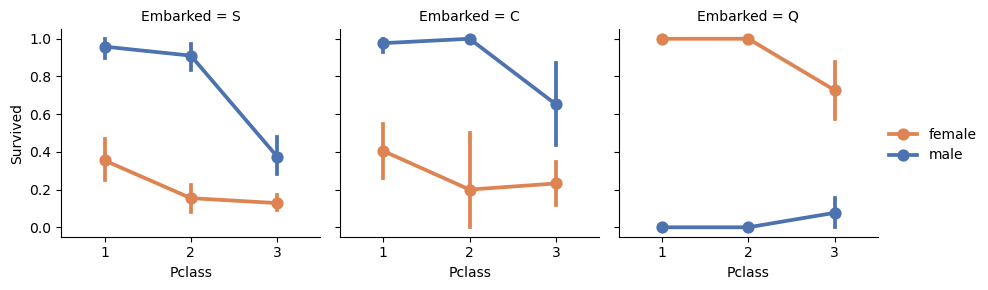

In [ ]:
g3 = sns.FacetGrid(train_df, col='Embarked')
g3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g3.add_legend()

c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


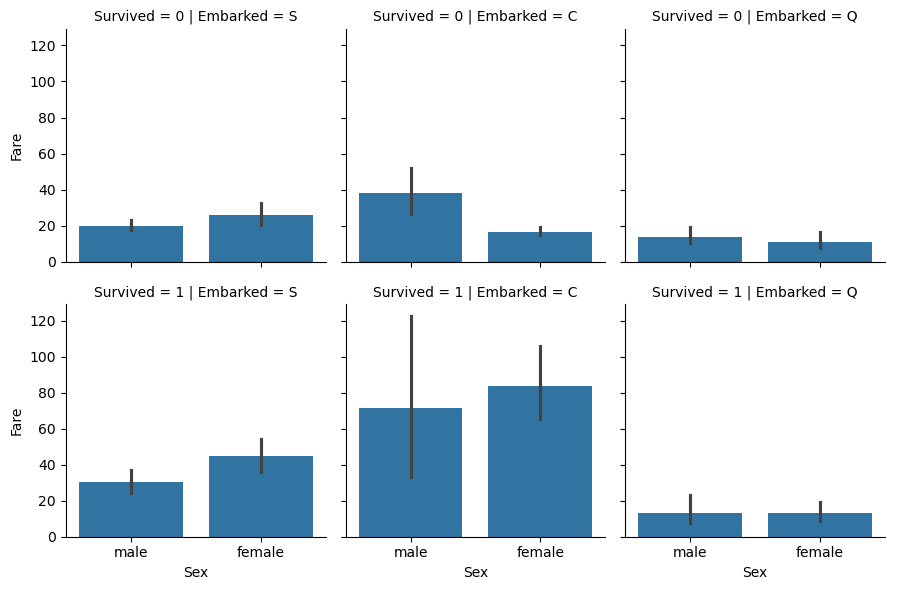

In [ ]:
g4 = sns.FacetGrid(train_df, row='Survived', col='Embarked')
g4.map(sns.barplot, 'Sex', 'Fare')
g4.add_legend()

c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


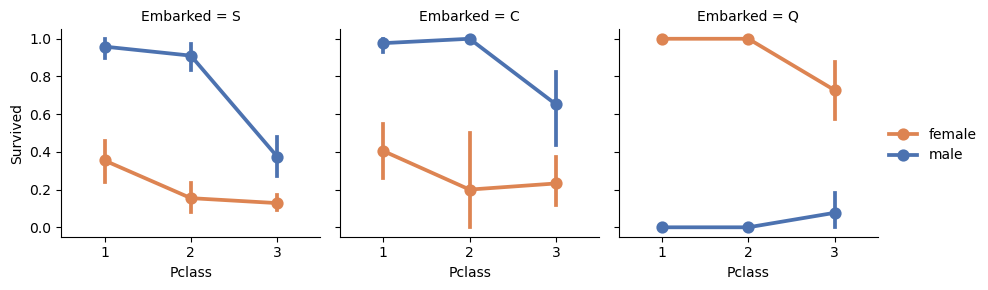

In [7]:
g = sns.FacetGrid(train_df, col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\LJH\miniconda3\envs\decisionTree\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


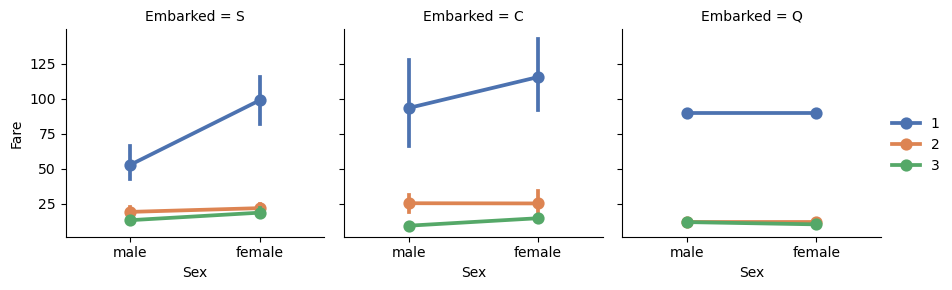

In [10]:
g = sns.FacetGrid(train_df, col='Embarked')
g.map(sns.pointplot, 'Sex', 'Fare', 'Pclass', palette='deep')
g.add_legend()

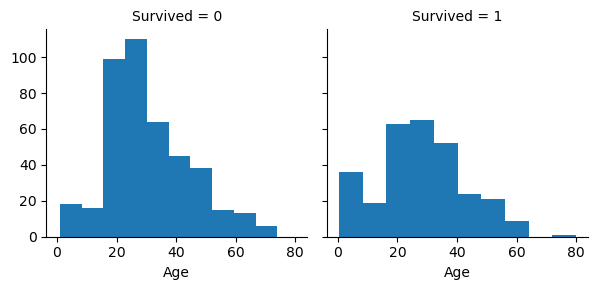

In [23]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age')
g.add_legend()

In [25]:
print(f'[Before]\ntrain_df.shape={train_df.shape}, test_df.shape={test_df.shape}\ncombine[0].shape={combine[0].shape}, combine[1].shape={combine[1].shape}')

[Before]
train_df.shape=(891, 12), test_df.shape=(418, 11)
combine[0].shape=(891, 12), combine[1].shape=(418, 11)


In [26]:
train_df = train_df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)
combine=[train_df, test_df]

In [27]:
print(f'[After]\ntrain_df.shape={train_df.shape}, test_df.shape={test_df.shape}\ncombine[0].shape={combine[0].shape}, combine[1].shape={combine[1].shape}')

[After]
train_df.shape=(891, 8), test_df.shape=(418, 7)
combine[0].shape=(891, 8), combine[1].shape=(418, 7)


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [30]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [37]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(2):
        for j in range(3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j-1] = int(age_guess/0.5+0.5)*0.5   # 0.5 단위로 반올림

    
    for i in range(2):
        for j in range(3):
            dataset.loc[
                (dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1) ,\
                'Age'           
            ] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)



In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [40]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,"(32.0, 48.0]"


In [ ]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

C:\Users\LJH\AppData\Local\Temp\ipykernel_2000\2719383348.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
1,"(16.0, 32.0]",0.377892
2,"(32.0, 48.0]",0.338509
4,"(64.0, 80.0]",0.090909


In [44]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\LJH\AppData\Local\Temp\ipykernel_2000\3955368509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.377892
2,"(32.0, 48.0]",0.338509
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [46]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 80), 'Age'] = 4

In [47]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [49]:
train_df.drop(['AgeBand'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S
887,1,1,1,1,0,0,30.0000,S
888,0,3,1,2,1,2,23.4500,S
889,1,1,0,1,0,0,30.0000,C


In [52]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,0,0,7.8292,Q
1,3,1,2,1,0,7.0000,S
2,2,0,3,0,0,9.6875,Q
3,3,0,1,0,0,8.6625,S
4,3,1,1,1,1,12.2875,S


In [53]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

C:\Users\LJH\AppData\Local\Temp\ipykernel_2000\31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,0,0,7.8292,Q
1,3,1,2,1,0,7.0000,S
2,2,0,3,0,0,9.6875,Q
3,3,0,1,0,0,8.6625,S
4,3,1,1,1,1,12.2875,S


In [54]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()

C:\Users\LJH\AppData\Local\Temp\ipykernel_2000\896776255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


# dfdf

In [ ]:

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

test_df.head(10)

In [55]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,0,0,7.8292,Q
1,3,1,2,1,0,7.0000,S
2,2,0,3,0,0,9.6875,Q
3,3,0,1,0,0,8.6625,S
4,3,1,1,1,1,12.2875,S
5,3,0,0,0,0,9.2250,S
6,3,1,1,0,0,7.6292,Q
7,2,0,1,1,1,29.0000,S
8,3,1,1,0,0,7.2292,C
9,3,0,1,2,0,24.1500,S


In [70]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [72]:
X_train = train_df.drop(['Survived', 'Embarked'], axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['Embarked'], axis=1)

In [59]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,0,0,7.8292,Q
1,3,1,2,1,0,7.0000,S
2,2,0,3,0,0,9.6875,Q
3,3,0,1,0,0,8.6625,S
4,3,1,1,1,1,12.2875,S


In [64]:
train_df = train_df.drop(['AgeBand'], axis=1)

In [ ]:
X_train = train_df.drop(['Survived'], axis=1)

In [67]:
X_train.head(), test_df.head()

(   Pclass  Sex  Age  SibSp  Parch     Fare Embarked
 0       3    0    1      1      0   7.2500        S
 1       1    1    2      1      0  71.2833        C
 2       3    1    1      0      0   7.9250        S
 3       1    1    2      1      0  53.1000        S
 4       3    0    2      0      0   8.0500        S,
    Pclass  Sex  Age  SibSp  Parch     Fare Embarked
 0       3    0    2      0      0   7.8292        Q
 1       3    1    2      1      0   7.0000        S
 2       2    0    3      0      0   9.6875        Q
 3       3    0    1      0      0   8.6625        S
 4       3    1    1      1      1  12.2875        S)

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [74]:
Y_pred = logreg.predict(X_test)

In [75]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.24

In [76]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.12